<p align = center  
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="center"><br><FONT FACE="times new roman" SIZE=5>
<b>Métrica de rendimiento: Órbita de planetas</b>
<br>
<i><b>Autor:</b></i> Juan Camilo De Los Ríos Hernández - 8º semestre
<br>
<i><b>Fecha: </b>08/11/2022
<br>
<b>Ciencias de la computación e Inteligencia Artificial</b></i>
<br>
</FONT>
</p>

# *Importación de modulos*

In [10]:
import pandas as pd
import matplotlib as plt

# *Introducción*

Con la necesidad de generar la comparativa entre los tiempos de ejecución de *python* y *cython* se realizó un ejercicio en el cual se tomaron dichas métricas y se almacenaron en un archivo *.csv*. Para la generación de dichos datos se tomaron *50* iteraciones en las cuales de manera incremental se modificaron tanto los pasos del algoritmo, como el marco de tiempo para cada repetición. Estos parámetros se consideraron de la siguiente manera:

*   step       $\rightarrow$ **Inicio:** 1 Millón, **Finaliza:** 50 Millones, **Paso:** 1 Millón

*   time_frame  $\rightarrow$ **Inicio:** 100, **Finaliza:** 5000, **Paso:** 100

Dicha configuración se puede apreciar en el contenido del archivo *planeta.csv*, este contendrá las lineas corresponientes a la cada iteración con su carga. La exploración profunda del dataset se realizará en la próxima sección.

# *Exploración del dataset*

> Se hace la lectura inicial del csv generado a partir del algoritmo descrito, se lee a partir del método de pandas. Posteriormente se hace una inspección de los datos del dataset. 

In [11]:
planetas_df = pd.read_csv("planeta.csv")
planetas_df.head()

,steps,time_frame,python,cython
0,1000000,100,1.89667,0.05341
1,2000000,200,3.86698,0.10934
2,3000000,300,5.82508,0.15414
3,4000000,400,7.87735,0.20948
4,5000000,500,9.60130,0.25177


Para hacer un estudio con el menor ruido posible, se hace la verificación de la distribución de los datos, en proporción se tiene una muestra homogénea

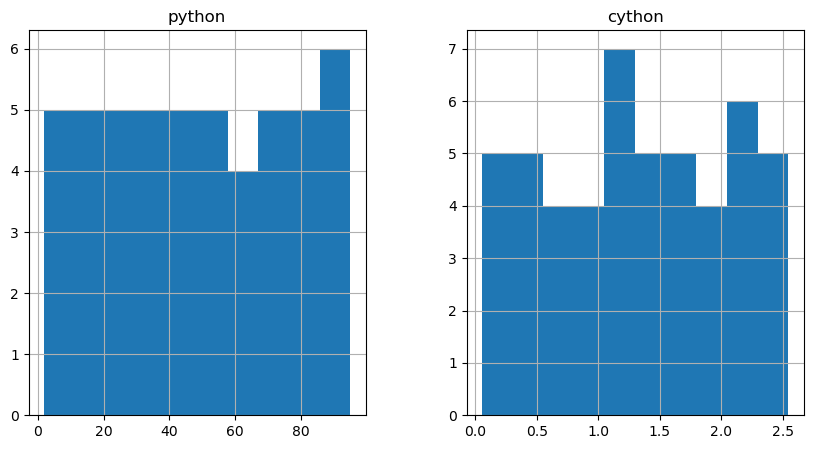

In [12]:
planetas_df.hist(figsize=(10,5), column=['python','cython'])
plt.pyplot.show()

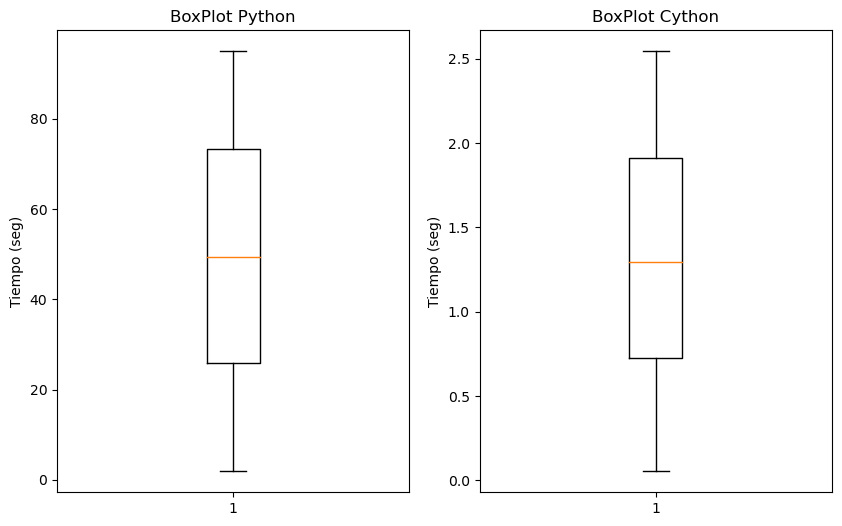

In [13]:
figure, axis = plt.pyplot.subplots(1,2, figsize =(10,6))
axis[0].boxplot(planetas_df['python'])
axis[0].set_title("BoxPlot Python")
axis[0].set_ylabel("Tiempo (seg)")
axis[1].boxplot(planetas_df['cython'])
axis[1].set_title("BoxPlot Cython")
axis[1].set_ylabel("Tiempo (seg)")

plt.pyplot.show()



> Adicionalmente se hacen las estadísticas descriptivas para las columnas de interés.

En estas se ve a priori la diferencia tan amplia que existen entre los tiempos de ejecución, teniendo **cython** un tiempo promedio de *1.308 segundos* a comparación de **python** que posee un promedio de *49.368 segundos*. Esto implica que solo sobre esta métrica implica una mejora de *37.743 veces*.

Por otro lado, hay una desviación estándar bastante grande en relación a la medida anteriormente mencionado dado que cython cuenta con una desviación de *0.733 segundos* y python una desviación de *28.199 segundos*

In [14]:
planetas_df[['cython','python']].describe()

,cython,python
count,50.000000,50.000000
mean,1.308570,49.367651
std,0.733424,28.199006
min,0.053410,1.896670
25%,0.725035,25.931977
50%,1.291385,49.351045
75%,1.908215,73.376563
max,2.543580,94.935350


> Se verifica la consistencia de los datos

In [15]:
planetas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   steps       50 non-null     int64  
 1   time_frame  50 non-null     int64  
 2   python      50 non-null     float64
 3   cython      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


# *Análisis del dataset*

En primera instancia, se hace necesario hacer la visualización correspondiente de las dos columnas de interés, inicialmente mediante un diagrama de barras para dimensionar la diferencia de magnitudes en los tiempos de ejecución expuestos durante la exploración del dataset. En esta es visible con facilidad la mejora tan radical que implica el uso de cython ya que lleva a que el rendimiento de un programa esté dado por las columnas naranjas demarcadas en la zona inferior a lo denotado por las pequeñas columnas azules.

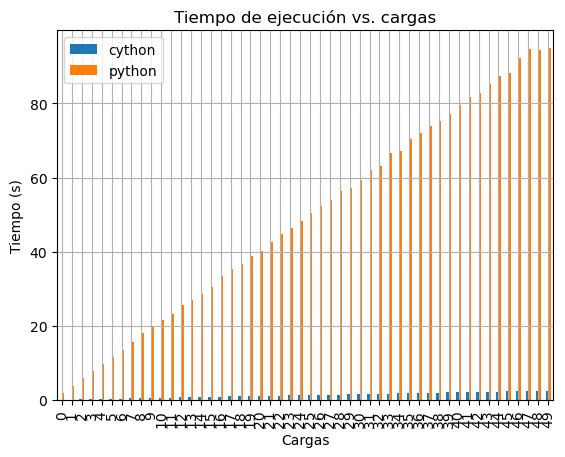

In [16]:
planetas_df[['cython','python']].plot(kind='bar',
                                    title='Tiempo de ejecución vs. cargas',
                                    grid=True,
                                    xlabel='Cargas',
                                    ylabel='Tiempo (s)'
                                    )
plt.pyplot.show()                                    

Adicionalmente, con el fin de hacer una revisión detallada del rendimiento dado por las dos aproximaciones, se hace la gráfica de las cargas en relación al tiempo de ejecución por cada una de ellas. Por ello se puede apreciar que a medida que el número de cargas aumentan, el rendimiento diverge cada vez más para las aproximaciones.  

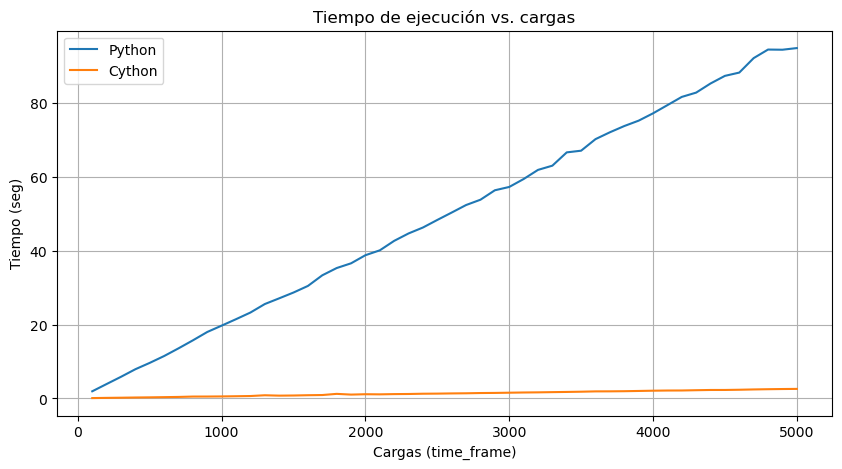

In [20]:
plt.rcParams["figure.figsize"] = (10,5)
plt.pyplot.plot(planetas_df['time_frame'], planetas_df['python'], label="Python")
plt.pyplot.plot(planetas_df['time_frame'], planetas_df['cython'], label="Cython")
plt.pyplot.title("Tiempo de ejecución vs. cargas")
plt.pyplot.xlabel("Cargas (time_frame)")
plt.pyplot.ylabel("Tiempo (seg)")
plt.pyplot.legend()
plt.pyplot.grid()
plt.pyplot.show()

Ahora, con el fin de verificar que tan superior puede llegar a ser cython a lo largo de la ejecución de módulos y cargas robustas es necesario cuantificar dicha información haciendo una medida pertinente. Esta se tomará como la cantidad de veces que *cython* supera a *python* en rendimiento, por ello se calculará para cada carga de la siguiente manera:

$\rightarrow$ *python_time* **/** *cython_time*

In [26]:
planetas_df['times_bet'] = [(planetas_df['python'][i])/(planetas_df['cython'][i]) for i in range(0,len(planetas_df))]

Al crear dicha columna, se hace el análisis estadístico nuevamente. En este se puede ver que todos los datos tienden a agruparse alrededor del valor de *37.462 veces* y este posee una desviación estándar muy baja (*1.769 veces*), lo que nos indica que es un intervalo de valor muy pequeño en el cual oscila dicha mejora de rendimiento, indicando que esta latencia de rendimiento pueda darse por ruido propiamente.

In [31]:
planetas_df['times_bet'].describe()

count    50.000000
mean     37.462865
std       1.769709
min      29.522468
25%      37.583462
50%      37.868990
75%      38.313331
max      39.302398
Name: times_bet, dtype: float64

Dicha información se puede ver consagrada en el histograma de la zona inferior, en donde se ve que dicha medida de rendimiento intenta tomar la forma de una distribución normal ya que los datos se intentan agrupar hacia el valor de 38 aproximadamente. Es posible que la calidad de esta métrica mejore con una mayor cantidad de muestras.

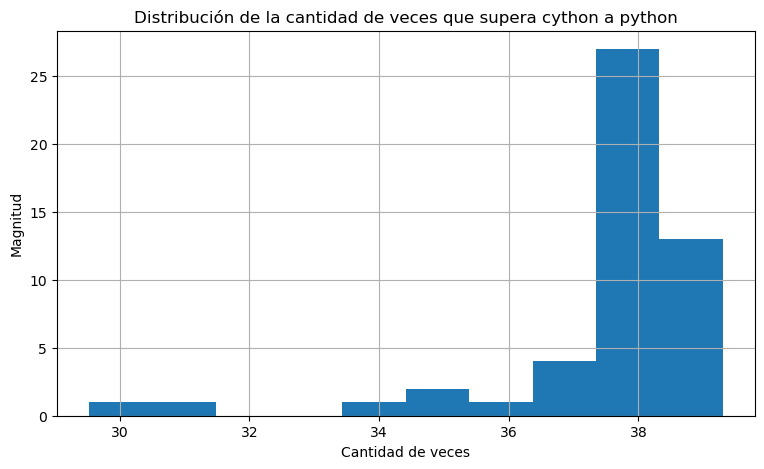

In [38]:
planetas_df['times_bet'].hist()
plt.pyplot.title("Distribución de la cantidad de veces que supera cython a python")
plt.pyplot.xlabel("Cantidad de veces")
plt.pyplot.ylabel("Magnitud")
plt.pyplot.show()

Adicionalmente, cabe destacar la evolución de la métrica planteada a partir de la cantidad de cargas propuestas. Anteriormente, podría parecer que cada vez aumentaba la diferencia de rendimiento entre las dos aproximaciones, sin embargo en la gráfica en la zona inferior se puede ver que esta va estabilizandose hacia el valor promedio anteriormente expuesto. Por otro lado se puede ver que hay dos momentos claves de dicha imágen, primeramente, hasta las *2000* cargas el rendimiento es fluctuante ya que va desde *29 veces* hasta *39 veces* y segundamente dicho comportamiento tiende a estabilizarse sobre el promedio expuesto con una pequeña desviación. Cabe agregar que el comportamiento puede variar dependiendo de las configuraciones y especificaciones del hardware, así como del estado y uso del software de la máquina.

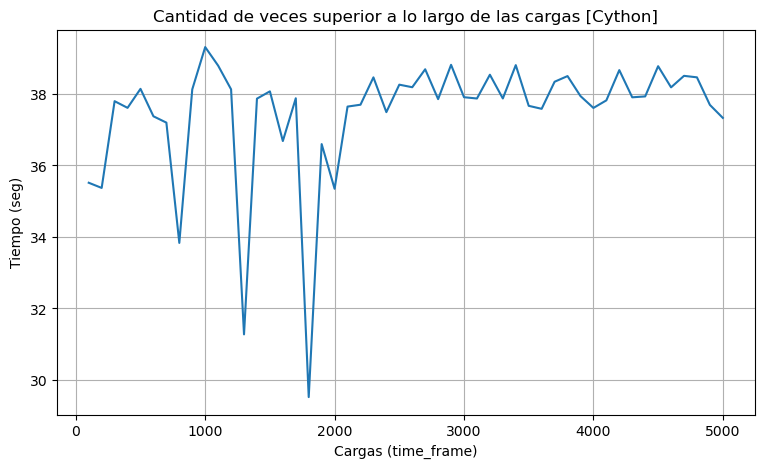

In [28]:
plt.rcParams["figure.figsize"] = (9,5)
plt.pyplot.plot(planetas_df['time_frame'], planetas_df['times_bet'])
plt.pyplot.title("Cantidad de veces superior a lo largo de las cargas [Cython]")
plt.pyplot.xlabel("Cargas (time_frame)")
plt.pyplot.ylabel("Tiempo (seg)")
plt.pyplot.grid()
plt.pyplot.show()

# *Conclusiones*

A modo de conclusión se obtiene que el rendimiento dado por los tiempos de ejecución para distintas cargas en cualquiera de las aproximaciones se puede generalizar como un coste de tipo lineal como se vió en las gráficas anteriormente, con la gran diferencia de la pendiente de cada una de estas ya que en la aproximación dada por *cython* se encuentran valores de poca magnitud en relación a *python*, recordando que los tiempos de cython tiene una desviación estándar baja lo que asegura que esta medida se mantendrá dentro de los rangos esperados. En adición, por medio de una gráfica de líneas se hizo el intento de cuantificación de la divergencia de rendimiento a medida que las cargas planteadas incrementaban. A pesar de que en dicha gráfica parecía estar mejorando el rendimiento cada vez más se creó una métrica independiente que exponía la cantidad de veces que cython superó a python. En esta se encontró que había un patrón evidente para dicha métrica dado que se agrupan los valores con forma de *distribución normal* con una desviación estándar baja. Con dicha métrica cabe concluir que la mejora que esta dada por el uso de *cython* en contraste a *python* es simplemente colosal ya que esta tiende a mejorar el rendimiento de un programa alrededor de un *37.463 veces* en promedio, con una desviación estándar muy baja de tan solo *1.769 veces*. Esto principalmente está dado por el gran impulso que da la compilación en el lenguaje *C* lo cual aprovecha de mejor manera los recursos, la jerarquía de memoria y los recursos computacionales ya que se tiene más cercanía al *harware*.

## *Limitaciones*


Por otro lado, cabe resaltar las limitaciones que surgieron a partir del experimento y durante la recopilación de los datos expuestos. Primeramente, dicha experimentación únicamente comprendía *un solo programa*, lo que hace que los datos tomados tengan cierto tipo de sesgo hacia los resultados y conclusiones obtenidas ya que no se asegura el uso completo y correcto de todos los recursos que cada herramienta puede proveer. En segunda instancia, en los datos analizados se encuentra cierto ruido el cual está generado por el uso del computador durante la toma de los datos, dicha situación hace que los recursos computacionales no estén correctamente completamente disponibles para la solución de los procesos dados a la máquina. Por último, dichos resultados tienen influencia sobre las especificaciones del hardware y software, por lo que acá se expondrá dicha información con fines informativos:
* Procesador **Intel Core i9 - 10900**
    * **10C/20T** @ 2.80GHz
    * L1 Caché: **64KB / core**
    * L2 Caché: **256 KB / core**
    * L3 Caché: **20M**
* RAM **16GB @ 3200 MHz**
* Ubuntu **22.04 LTS**

## *Recomendaciones*

Finalmente, se hace necesario plantear una serie de recomendaciones con el fin de mejorar aún más la profundidad y la exactitud del experimento planteado. Por ello se exponen los siguientes puntos de mejoría:
* Tomar en cuenta las limitaciones dadas en la zona superior. Es decir, realizar más programas que puedan comprender el uso total del potencial dado por ambas herramientas, así como la optimización correcta de dichos programas. Adicionalmente, mantener en reposo la máquina en ejecución mientras que se obtienen los datos.
* Realizar más iteraciones por cada experimento y carga para lograr acercar la información y los resultados obtenidos a la realidad del rendimiento que se puede dar por medio de *cython* ya que se reducirá el ruido por todas las fuentes de forma sustancial.
* Dado que *cython* es una herramienta que intenta aprovechar al máximo la sintáxis de *python* y la compilación de *C* se recomienda aprovechar principalmente el uso del procesamiento paralelo y distribuido por la misma cercanía a la máquina. En *cython* está principalmente dada por GIL (Global Interpreter Lock) que se asegura que solo haya disponible un *hilo* para el uso constante con *python*. Por lo que utilizando la bandera `with nogil` o el decorador `@cython.nogil` se puede liberar a esta herramienta de dicho bloqueo. Sin embargo se recomienda el uso de bibliotecas más especializadas nativas en cython como las expuestas [aquí](https://cython.readthedocs.io/en/latest/src/userguide/parallelism.html) o módulos propios de *C* para el uso paralelo del nodo como **OpenMP** y módulos para el procesamiento distribuido como **MPI**. Un ejemplo de dicha implementación se puede encontrar en el cápitulo 5 del siguiente [recurso](https://ipython-books.github.io/).